MAKİNE ÖĞRENMESİ PROJE ÖDEVİ - ŞARAP KALİTE SKORU TAHMİNİ - SINIFLANDIRMA

G211210006 BERKEHAN UYGUR
G211210004 RAMAZAN SEFA KURTULUŞ

Dataset kaggle linki: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
Bu veri seti, Portekiz "Vinho Verde" cinsi kırmızı şaraplarla ilgilidir. Veri seti, şarapta bulunan çeşitli kimyasalların miktarını ve bunların şarap kalitesi üzerindeki etkilerini açıklamaktadır. Veri kümeleri sınıflandırma veya regresyon problemi olarak görülebilir. 

Girdi değişkenleri (float):
1 - sabit asitlik
2 - uçucu asitlik
3 - sitrik asit
4 - artık şeker
5 - klorürler
6 - serbest kükürt dioksit
7 - toplam kükürt dioksit
8 - yoğunluk
9 - pH
10 - sülfat
11 - alkol

Çıkış değişkeni (int):
12 - kalite (0 ile 10 arasında puan)

Veri boyutu: 1143 , 12 özellik
Dengesiz sınıf dağılımı

In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_raw = pd.read_csv("../data/WineQT.csv")
class_count = data_raw['quality'].value_counts()

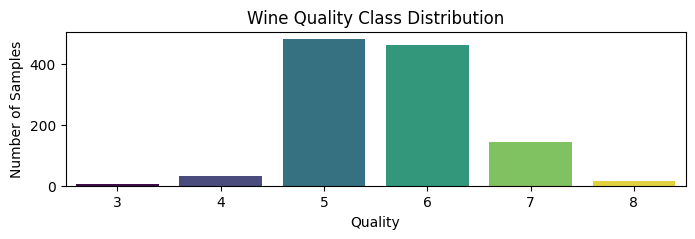

In [472]:
plt.figure(figsize=(8, 2))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="viridis", legend=False)
plt.title("Wine Quality Class Distribution")
plt.xlabel("Quality")
plt.ylabel("Number of Samples")
plt.show()

In [473]:
missing_values = data_raw.isnull().sum()
print(missing_values)

#EKSİK VERİMİZ YOK, FAKAT ALTTAKİ GRAFİKLERDE GÖRÜLDÜĞÜ ÜZERE BAZI ÖZELLİKLERDE AYKIRI DEĞERLER VAR

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


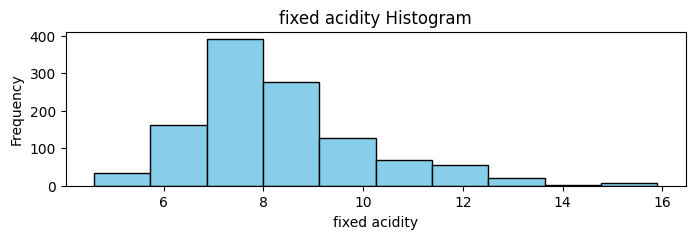

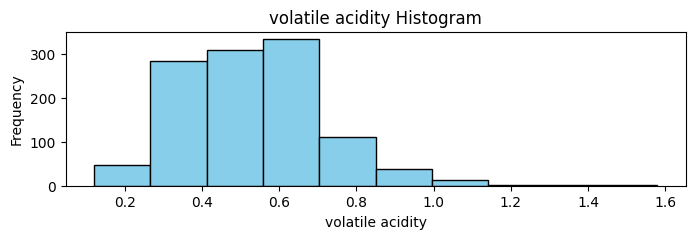

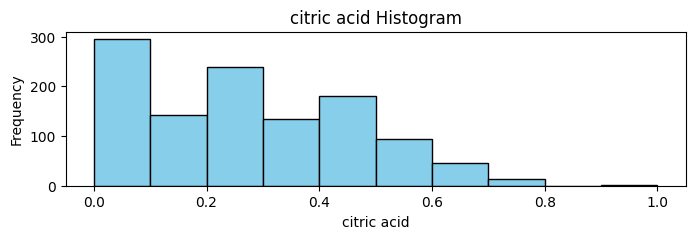

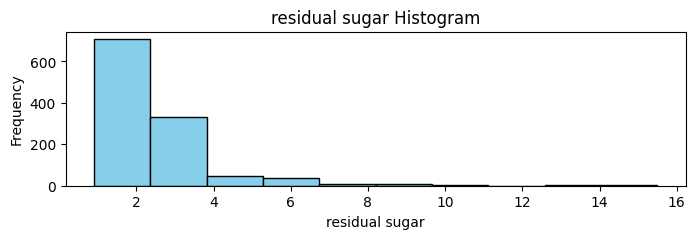

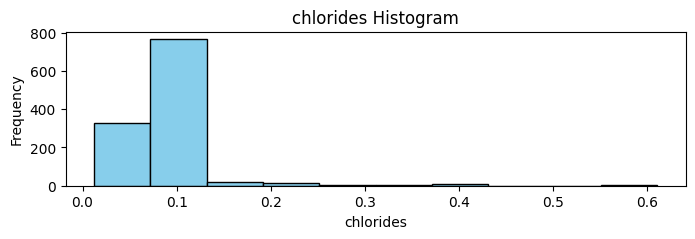

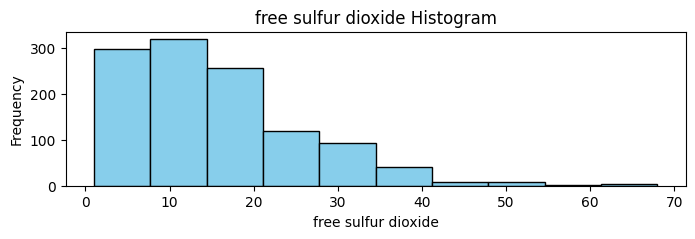

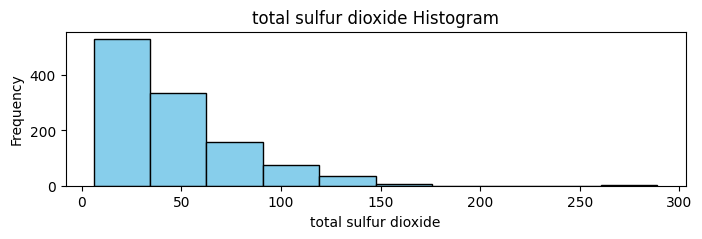

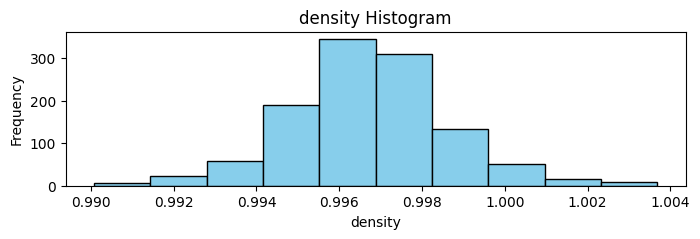

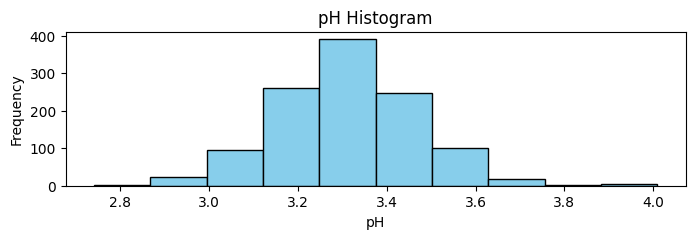

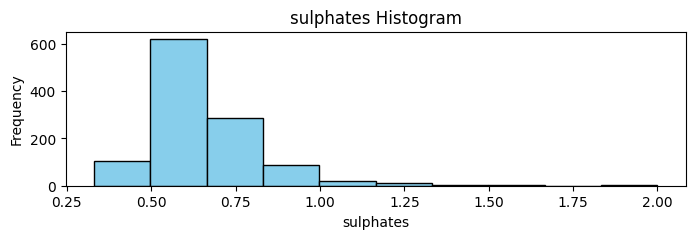

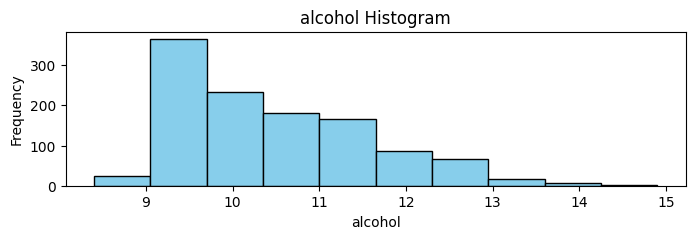

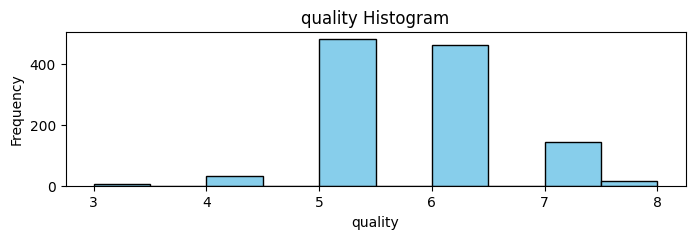

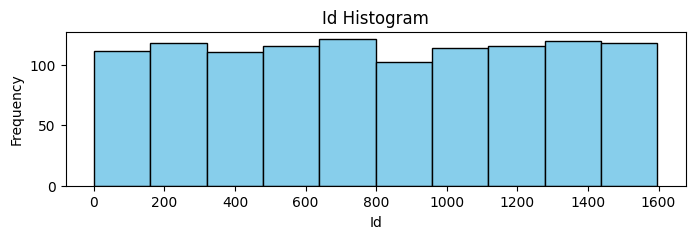

In [474]:
#AYKIRI DEĞERE SAHİP ÖZELLİKLERİ BELİRLEYELİM
numerical_columns = data_raw.select_dtypes(include=['float64', 'int64']).columns

# Her sütun için histogram çizme
for column in numerical_columns:
    plt.figure(figsize=(8, 2))
    plt.hist(data_raw[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

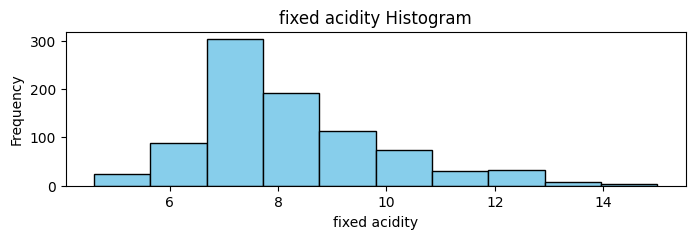

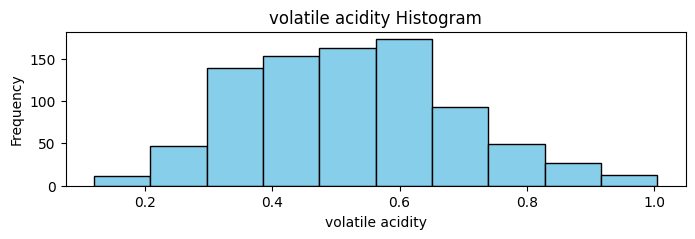

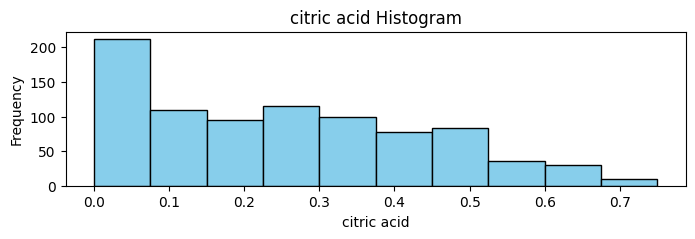

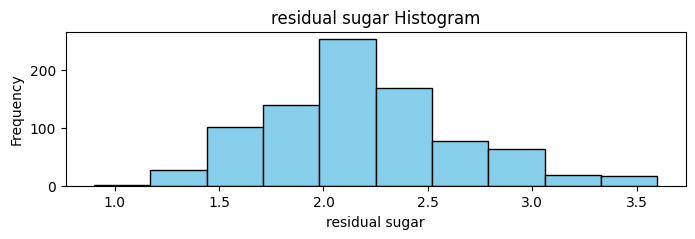

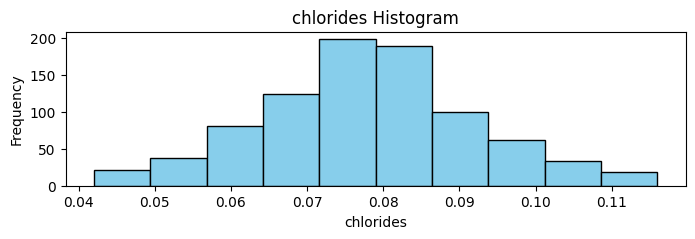

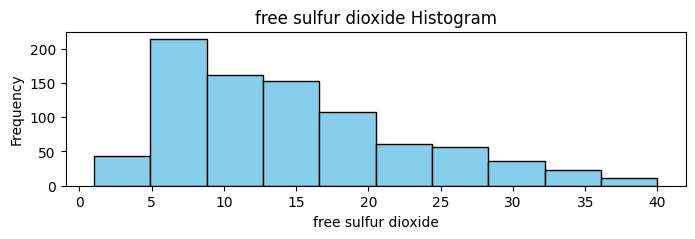

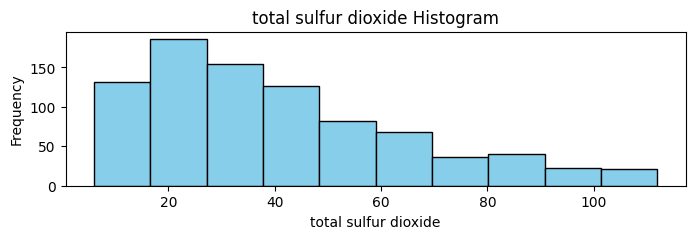

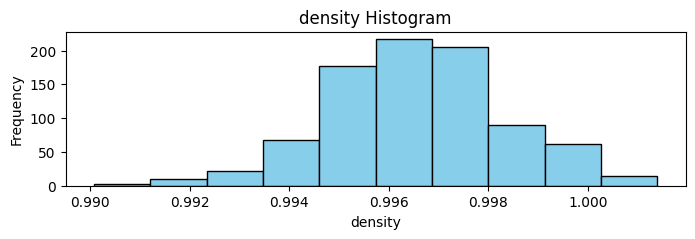

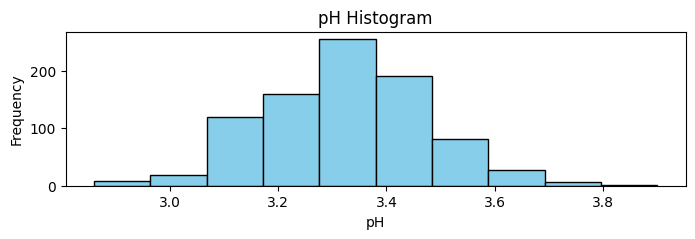

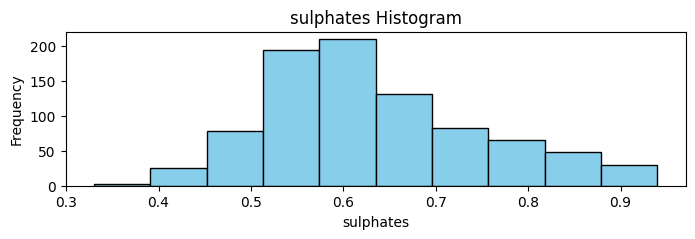

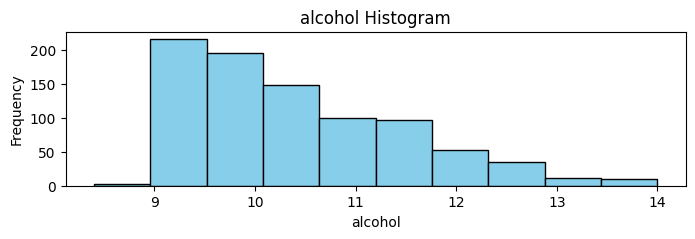

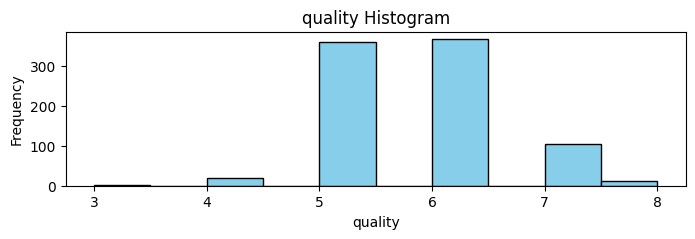

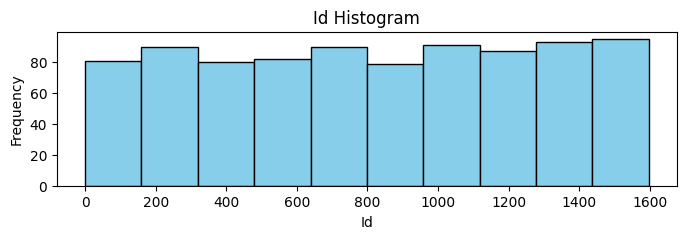

In [475]:
outliers = ['volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']  # Bu özellikler aykırı değerlere sahip

for column in outliers:
    Q1 = data_raw[column].quantile(0.25)
    Q3 = data_raw[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Aykırı değerleri filtrele (sil)
    data_raw = data_raw[(data_raw[column] >= lower_bound) & (data_raw[column] <= upper_bound)]

cleaned_data = data_raw

numerical_columns = data_raw.select_dtypes(include=['float64', 'int64']).columns

# Her sütun için histogram çizme
for column in numerical_columns:
    plt.figure(figsize=(8, 2))
    plt.hist(data_raw[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [476]:
from sklearn.preprocessing import StandardScaler

# Standardizasyon
scaler = StandardScaler()
numerical_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
cleaned_data[numerical_columns] = scaler.fit_transform(cleaned_data[numerical_columns])

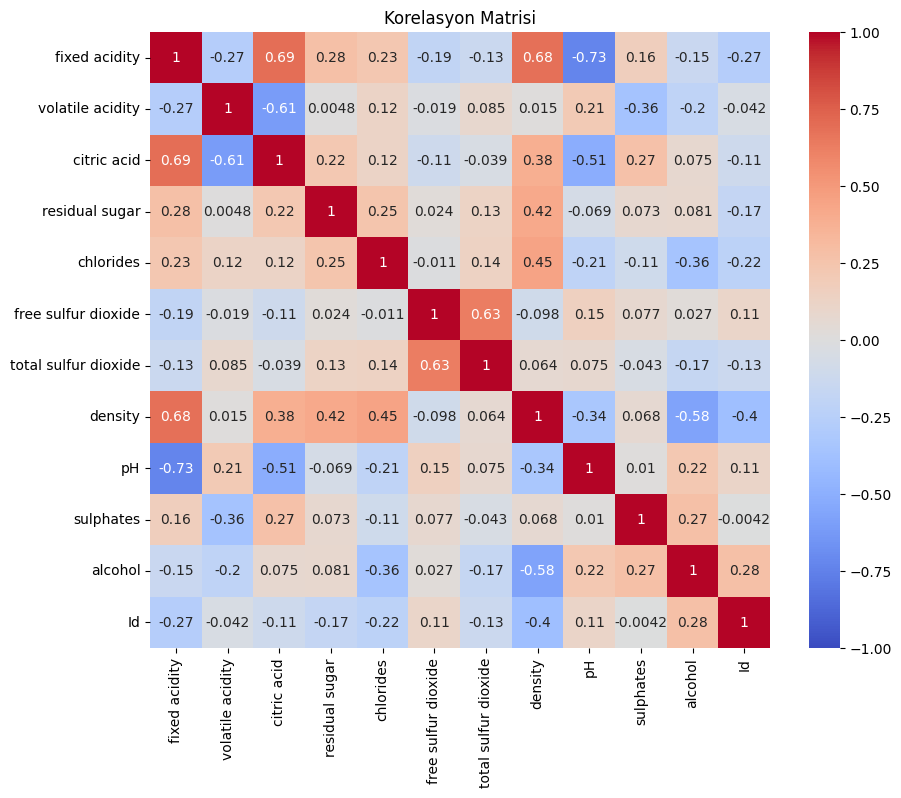

In [477]:
import seaborn as sns
import matplotlib.pyplot as plt

input_matrix = cleaned_data.drop('quality',axis=1)
correlation_matrix = input_matrix.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasyon Matrisi")
plt.show()